In [2]:
import os # for the directory 
import csv # reading files
import pandas as pd  # data analysis tools
import numpy as np
from pandas import DataFrame # easier to analysis
fname=r"C:\Users\mohab\gdc_download_PhiSci" # locate the location 
os.chdir(r"C:\Users\mohab\gdc_download_PhiSci") # assign the default work folder 
list_names = os.listdir(fname) # to include all files into one list variable

In [3]:
# to assign the name of the first column
genes=[] 
#for file in list_names:
with open('uniPortRev_final.txt', newline = '\n') as rowByRow:
    rowByRowReader = csv.reader(rowByRow, delimiter='\t') # reading the file based on a specific separator format
    for rowByRow in rowByRowReader:
        temp_gene = rowByRow[0]
        temp_sep = temp_gene.split(',') 
        len_gene = len(temp_sep)
        if len_gene > 1:
            for i in range(0, len_gene):
                genes.append(temp_sep[i]) # append line by line to the list
        else:
             genes.append(rowByRow[0])

In [4]:
#prior to eliminating the uniqueness values
len(genes)

19354

In [5]:
# after the elimination of the replicated genes
print(len(np.unique(genes)))

19320


In [6]:
# the first file we need to select genes from
finalTable = pd.read_csv("Final_table.csv")

In [27]:
final_genes = np.unique(genes)
print(len(final_genes))
# first filter to match reviewed with the new list of genes
finalTableVer = finalTable[finalTable['gene_type'].isin(final_genes)]
print(len(finalTableVer))

19320
19319


In [28]:
finalTableTemp = DataFrame(finalTableVer) # make a copy of the original DataFrame table

In [29]:
# apply filter 2: to select all gene expr. satisfy FPKM >= 10
finalTableTemp = finalTableTemp[finalTableTemp >= 10]
# to compute the percentage
index_satisfied = finalTableTemp.notnull().sum(axis=1)/len(finalTableTemp.columns)
# apply filter 3: to select all 25% of samples
index_mask = index_satisfied.apply(lambda index_satisfied_val: True if index_satisfied_val >= 0.25 else False)
# to specify matching genes' indecis
indices = index_mask[index_mask].index.values
# to retrive the original genes matching all filters from the origianl finalTableVer
finalTableVer = finalTableVer.loc[indices]

In [30]:
finalTableVer.head()

,gene_type,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,...,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A
5,ENSG00000146083,10.661934,12.756923,19.094920,11.168274,9.837056,8.492741,14.357999,10.657586,4.684553,...,16.609420,24.518670,7.972194,15.663358,8.498830,5.047150,13.362832,13.049457,12.322913,13.465018
8,ENSG00000198242,81.616770,143.482436,147.946233,232.389325,100.903838,122.296654,162.093251,226.445669,222.753788,...,138.564509,58.304312,290.846355,141.402228,91.546297,150.911361,131.525148,176.059819,165.412981,151.470036
13,ENSG00000134108,28.928312,28.534671,17.519692,29.839709,27.732027,29.279139,34.033121,33.251160,39.433805,...,26.203790,23.218813,40.895382,16.916851,36.458708,34.414775,21.835067,22.489643,23.130244,18.624145
16,ENSG00000167700,7.009133,9.236998,12.641371,3.295189,6.567039,5.380338,16.867815,5.541990,10.626663,...,8.342286,15.814094,43.232885,59.541307,2.790925,6.158072,16.151019,11.158516,14.873878,8.439518
35,ENSG00000070087,11.528930,35.262508,21.360249,19.262166,6.018708,21.831890,16.948324,6.473000,76.293859,...,51.652239,65.961468,36.706772,35.560580,7.134631,7.486116,22.513775,31.904202,59.875741,5.977690


In [31]:
finalTableVer.shape

(5430, 594)

In [32]:
# Method 1: log2 
log_finalTableVer = finalTableVer.apply(lambda cell: np.log2(cell+1) if np.issubdtype(cell.dtype, np.number) else cell)

# Method 1: log2 
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#for c in [c for c in finalTableVer.columns if finalTableVer[c].dtype in numerics]:
#    finalTableVer[c] = np.log2(finalTableVer[c]+1)

In [33]:
log_finalTableVer.head()

,gene_type,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,...,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A
5,ENSG00000146083,3.543735,3.782086,4.328759,3.605053,3.437901,3.246825,3.940918,3.543197,2.507047,...,4.138276,4.673481,3.165461,4.058607,3.247750,2.596255,3.844268,3.812442,3.735838,3.854496
8,ENSG00000198242,6.368363,7.174750,7.218648,7.866595,6.671065,6.945990,7.349553,7.829378,7.805768,...,7.124788,5.890065,8.189065,7.153828,6.532103,7.247086,7.050122,7.468093,7.378624,7.252382
13,ENSG00000134108,4.903439,4.884338,4.210988,4.946717,4.844588,4.920252,5.130648,5.098081,5.337490,...,4.765736,4.598056,5.388719,4.163245,5.227229,5.146279,4.513179,4.553953,4.592771,4.294558
16,ENSG00000167700,3.001646,3.355721,3.769917,2.102722,2.919729,2.673633,4.159291,2.709730,3.539365,...,3.223776,4.071599,5.467047,5.919848,1.922550,2.839571,4.100222,3.603895,3.988583,3.238713
35,ENSG00000070087,3.647191,5.180407,4.482864,4.340716,2.811206,4.512978,4.165777,2.901687,6.272282,...,5.718423,6.065259,5.236752,5.192217,3.024077,3.085104,4.555434,5.040200,5.927796,2.802749


In [15]:
#to convert the output Data Frame Table to a correponding CSV format
log_finalTableVer.to_csv(r'Final_table_filtered_log2.csv', index = False)

In [34]:
# load and summarize the sonar dataset
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# summarize the shape of the dataset
print(log_finalTableVer.shape)
# summarize each variable
print(log_finalTableVer.describe())

(5430, 594)
       TCGA-J2-8192-01A  TCGA-75-5122-01A  TCGA-91-A4BC-01A  TCGA-49-6745-01A  \
count       5430.000000       5430.000000       5430.000000       5430.000000   
mean           4.371034          4.283191          4.362163          4.350860   
std            1.307095          1.551927          1.511593          1.376347   
min            0.000000          0.000000          0.022766          0.000000   
25%            3.510060          3.335250          3.474401          3.493046   
50%            4.124760          4.024998          4.117359          4.101977   
75%            4.951196          5.026256          4.980971          4.963733   
max           12.421416         13.481841         14.020329         11.878568   

       TCGA-44-2665-11A  TCGA-64-1681-01A  TCGA-55-7911-01A  TCGA-69-7974-01A  \
count       5430.000000       5430.000000       5430.000000       5430.000000   
mean           4.157147          4.406077          4.373181          4.372560   
std            

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5E3377668>,
      dtype=object)

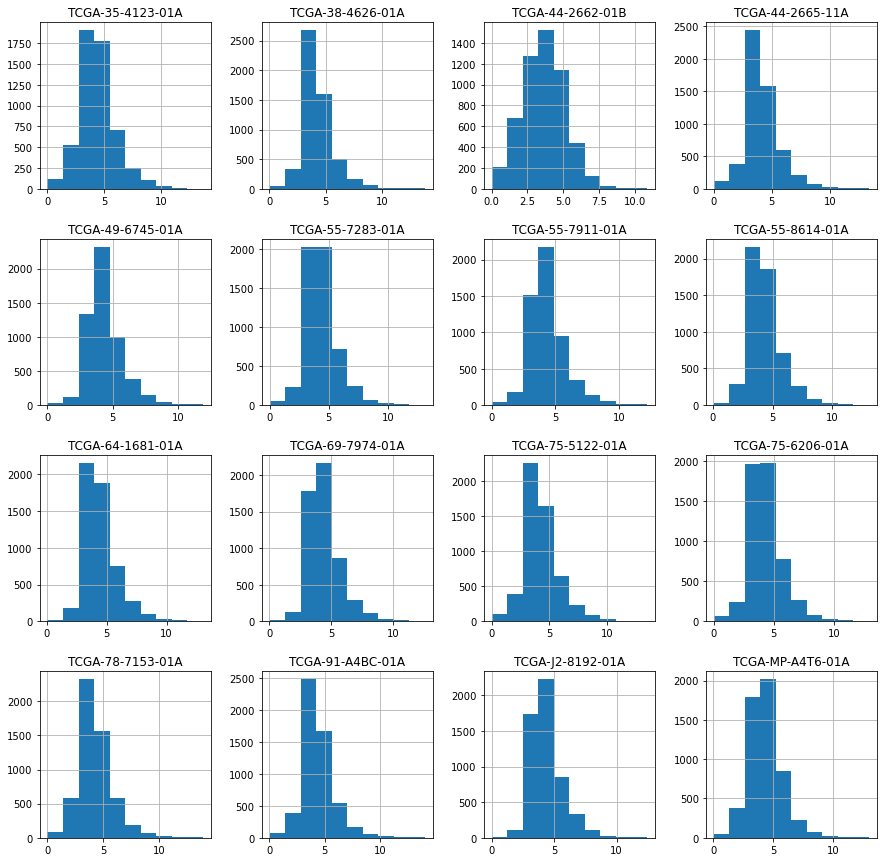

In [38]:
# histograms of the variables
#finalTableVer.loc['TCGA-S2-AA1A-01A'].hist()
#pyplot.show()
log_finalTableVer.iloc[:,:17].hist(figsize=(15,15))